In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load data
loan_default = pd.read_csv("loan_default.csv")

print(loan_default)


     Default  Checking_amount  Term  Credit_score     Sex Marital_status   \
0          0              988    15           796  Female          Single   
1          0              458    15           813  Female          Single   
2          0              158    14           756  Female          Single   
3          1              300    25           737  Female          Single   
4          1               63    24           662  Female          Single   
..       ...              ...   ...           ...     ...             ...   
995        1               17    21           562    Male         Married   
996        0              590    18           873  Female          Single   
997        0              343    16           824    Male         Married   
998        0              709    16           811    Male         Married   
999        0              991    15           794    Male         Married   

     Car_loan  Personal_loan  Home_loan  Education_loan  Emp_status  Amount

In [6]:
# Create dummy variables (one-hot encoding)
categorical_features = loan_default.select_dtypes(include=['object', 'category']).columns
numerical_features = loan_default.select_dtypes(include=['int64', 'float64']).drop('Default', axis=1).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

In [7]:
# Define the response and predictors
X = loan_default.drop('Default', axis=1)
y = loan_default['Default']

# Partition Data (Training & Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99, stratify=y)

In [8]:
# Pipeline including preprocessing and model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))
])

In [9]:
# Train the model
model.fit(X_train, y_train)

# Predict probabilities
y_train_pred_proba = model.predict_proba(X_train)[:, 1]
y_test_pred_proba = model.predict_proba(X_test)[:, 1]

In [10]:
# Calculate AUC
train_auc = roc_auc_score(y_train, y_train_pred_proba)
test_auc = roc_auc_score(y_test, y_test_pred_proba)

print(f'Training AUC: {train_auc:.2f}')
print(f'Testing AUC: {test_auc:.2f}')

Training AUC: 0.98
Testing AUC: 0.97


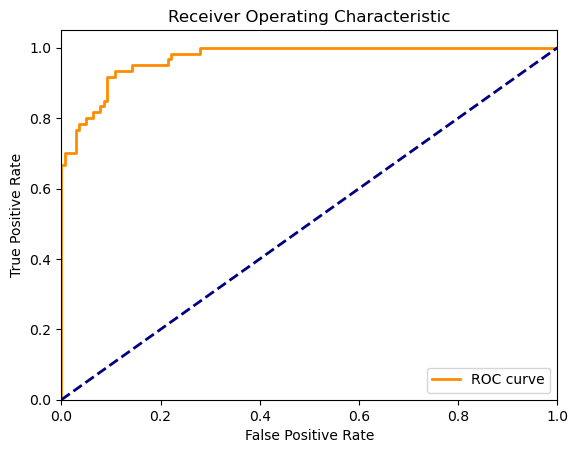

In [12]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Explanation of Steps taken in project:
# 1. Load Data: Reads the CSV file containing the loan default data.
# 2. Create Dummy Variables: Uses ColumnTransformer to apply StandardScaler to numerical features and OneHotEncoder to categorical features.
# 3. Partition Data: Splits the dataset into training and testing sets.
# 4. Model Pipeline: Constructs a pipeline with preprocessing and logistic regression.
# 5. Training: Fits the model to the training data.
# 6. Predicting and Evaluating: Predicts probabilities for the training and testing sets and calculates the AUC. It also plots the ROC curve.